In [8]:
import warnings
import opendatasets as od
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white", palette="muted", color_codes=True)


warnings.filterwarnings("ignore")

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

In [9]:
# od.download("https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data")

In [10]:
folder = "store-sales-time-series-forecasting"

datasets = [
    folder + "/" + f for f in os.listdir('store-sales-time-series-forecasting')
]

In [11]:
datasets

['store-sales-time-series-forecasting/holidays_events.csv',
 'store-sales-time-series-forecasting/oil.csv',
 'store-sales-time-series-forecasting/sample_submission.csv',
 'store-sales-time-series-forecasting/stores.csv',
 'store-sales-time-series-forecasting/test.csv',
 'store-sales-time-series-forecasting/train.csv',
 'store-sales-time-series-forecasting/transactions.csv']

#### holidays_events

In [12]:
holiday_df = pd.read_csv(datasets[0], parse_dates=["date"])

In [13]:
for col in holiday_df.columns[1:]:
    print(col)
    print("*" * len(col))
    print(holiday_df[col].value_counts())
    print()

type
****
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

locale
******
National    174
Local       152
Regional     24
Name: locale, dtype: int64

locale_name
***********
Ecuador                           174
Quito                              13
Riobamba                           12
Guaranda                           12
Latacunga                          12
Ambato                             12
Guayaquil                          11
Cuenca                              7
Ibarra                              7
Salinas                             6
Loja                                6
Santa Elena                         6
Santo Domingo de los Tsachilas      6
Quevedo                             6
Manta                               6
Esmeraldas                          6
Cotopaxi                            6
El Carmen                           6
Santo Domingo                       6
Machala             

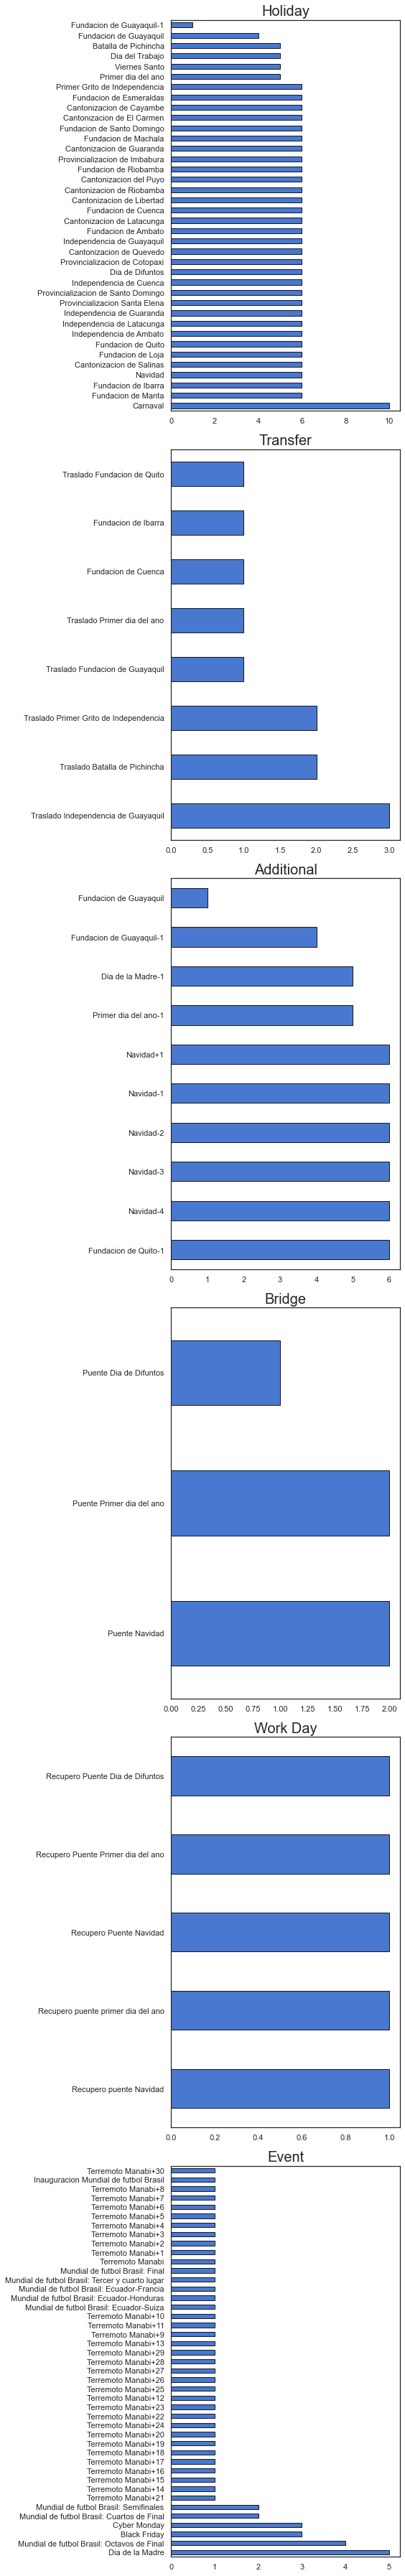

In [14]:
fig, axes = plt.subplots(6, 1, figsize=(8, 50), tight_layout=True)

for name, ax in zip(holiday_df["type"].unique(), axes.flatten()):

    holiday_df.loc[holiday_df["type"].eq(name), "description"].value_counts().\
        plot(kind="barh", ax=ax, edgecolor="k")

    ax.set_title(name)

"Holidays" are official holidays that repeats every year. Additional holidays usually occurs before and/or after the official holidays. A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government. 

Events are not exactly holidays special events that probably affect the sales. The main events here are Football, earthquake in manabi, Monthers day, black friday and cyber monday. 

In [15]:
holiday_df.query("description == 'Cyber Monday'")

,date,type,locale,locale_name,description,transferred
145,2014-12-01,Event,National,Ecuador,Cyber Monday,False
199,2015-11-30,Event,National,Ecuador,Cyber Monday,False
285,2016-11-28,Event,National,Ecuador,Cyber Monday,False


In [16]:
holiday_df.query("description == 'Black Friday'")

,date,type,locale,locale_name,description,transferred
144,2014-11-28,Event,National,Ecuador,Black Friday,False
198,2015-11-27,Event,National,Ecuador,Black Friday,False
284,2016-11-25,Event,National,Ecuador,Black Friday,False


In [17]:
holiday_df.query("description.str.contains(r'Madre')")

,date,type,locale,locale_name,description,transferred
53,2013-05-11,Additional,National,Ecuador,Dia de la Madre-1,False
55,2013-05-12,Event,National,Ecuador,Dia de la Madre,False
102,2014-05-10,Additional,National,Ecuador,Dia de la Madre-1,False
103,2014-05-11,Event,National,Ecuador,Dia de la Madre,False
171,2015-05-09,Additional,National,Ecuador,Dia de la Madre-1,False
172,2015-05-10,Event,National,Ecuador,Dia de la Madre,False
242,2016-05-07,Additional,National,Ecuador,Dia de la Madre-1,False
245,2016-05-08,Event,National,Ecuador,Dia de la Madre,False
310,2017-05-13,Additional,National,Ecuador,Dia de la Madre-1,False
311,2017-05-14,Event,National,Ecuador,Dia de la Madre,False


### oil

In [18]:
oil_df = pd.read_csv(datasets[1], parse_dates=["date"], index_col="date")

In [19]:
oil_df.info()  # some missing values exists

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1218 entries, 2013-01-01 to 2017-08-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dcoilwtico  1175 non-null   float64
dtypes: float64(1)
memory usage: 19.0 KB


In [20]:
oil_df.isna().sum()  # 43 missing values

dcoilwtico    43
dtype: int64

In [21]:
oil_df.index.freq = "B"  # setting data frequency to business days

In [22]:
oil_df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-07', '2013-01-08', '2013-01-09', '2013-01-10',
               '2013-01-11', '2013-01-14',
               ...
               '2017-08-18', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-28', '2017-08-29',
               '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', name='date', length=1218, freq='B')

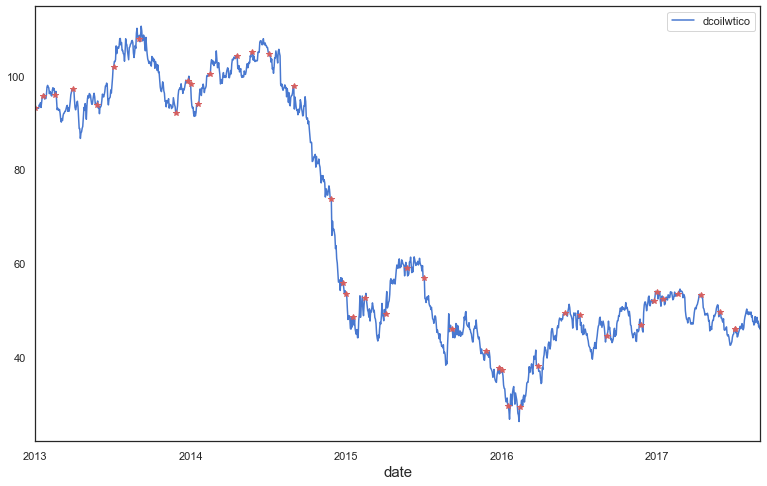

In [23]:
oil_df_imputed = oil_df.fillna(method="ffill").fillna(method="bfill")

ax = oil_df_imputed.plot(figsize=(13, 8), linestyle="-")

oil_df_imputed[oil_df.isnull()].plot(ax=ax,
                                     legend=None,
                                     marker="*",
                                     color="r",
                                     linestyle="-")

### stores

In [24]:
store_df = pd.read_csv(datasets[3])
store_df

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [25]:
for col in store_df.columns[1:]:
    print(col)
    print("*" * len(col))
    print(store_df[col].value_counts())
    print()

city
****
Quito            18
Guayaquil         8
Cuenca            3
Santo Domingo     3
Manta             2
Latacunga         2
Machala           2
Ambato            2
Quevedo           1
Esmeraldas        1
Loja              1
Libertad          1
Playas            1
Daule             1
Babahoyo          1
Salinas           1
Puyo              1
Guaranda          1
Ibarra            1
Riobamba          1
Cayambe           1
El Carmen         1
Name: city, dtype: int64

state
*****
Pichincha                         19
Guayas                            11
Santo Domingo de los Tsachilas     3
Azuay                              3
Manabi                             3
Cotopaxi                           2
Tungurahua                         2
Los Rios                           2
El Oro                             2
Chimborazo                         1
Imbabura                           1
Bolivar                            1
Pastaza                            1
Santa Elena                    

Most of the stores are located in Quito, the capital of Ecuador

In [26]:
np.sort(store_df["store_nbr"].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54], dtype=int64)

### Train

In [27]:
# train_df = ps.read_csv(datasets[5])
# ps.to_datetime(train_df["date"])

In [28]:
train_df = pd.read_csv(datasets[5], parse_dates=["date"]).drop("id", axis=1)

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   family       object        
 3   sales        float64       
 4   onpromotion  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 114.5+ MB


In [30]:
train_df.isnull().sum()  # No null values

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [31]:
print(train_df["family"].unique())
print(len(train_df["family"].unique()))

# 33 products for each store

['AUTOMOTIVE' 'BABY CARE' 'BEAUTY' 'BEVERAGES' 'BOOKS' 'BREAD/BAKERY'
 'CELEBRATION' 'CLEANING' 'DAIRY' 'DELI' 'EGGS' 'FROZEN FOODS' 'GROCERY I'
 'GROCERY II' 'HARDWARE' 'HOME AND KITCHEN I' 'HOME AND KITCHEN II'
 'HOME APPLIANCES' 'HOME CARE' 'LADIESWEAR' 'LAWN AND GARDEN' 'LINGERIE'
 'LIQUOR,WINE,BEER' 'MAGAZINES' 'MEATS' 'PERSONAL CARE' 'PET SUPPLIES'
 'PLAYERS AND ELECTRONICS' 'POULTRY' 'PREPARED FOODS' 'PRODUCE'
 'SCHOOL AND OFFICE SUPPLIES' 'SEAFOOD']
33


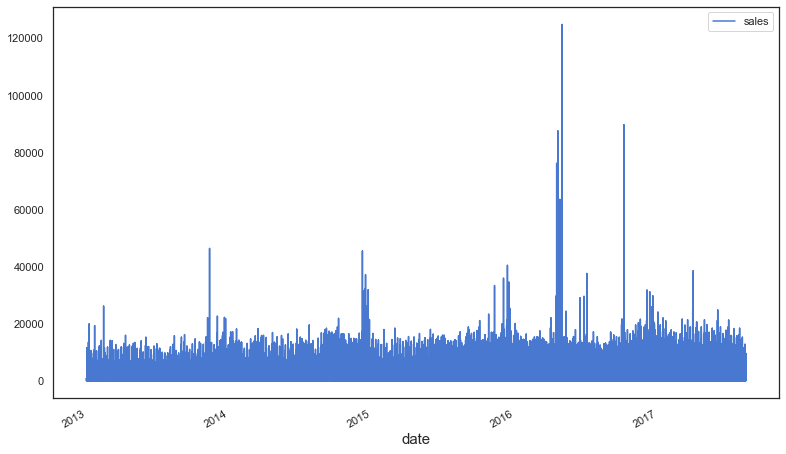

In [32]:
train_df.set_index("date").plot(y="sales", figsize=(13, 8))

In [33]:
# Extracting extra freatures from date columns

train_df["day"] = train_df["date"].dt.day
train_df["month"] = train_df["date"].dt.month
train_df["year"] = train_df["date"].dt.year
train_df["day_of_week"] = train_df["date"].dt.dayofweek
train_df["day_of_year"] = train_df["date"].dt.dayofyear
train_df["is_weekend"] = train_df["date"].dt.dayofweek > 4

train_df.head()

,date,store_nbr,family,sales,onpromotion,day,month,year,day_of_week,day_of_year,is_weekend
0,2013-01-01,1,AUTOMOTIVE,0.0,0,1,1,2013,1,1,False
1,2013-01-01,1,BABY CARE,0.0,0,1,1,2013,1,1,False
2,2013-01-01,1,BEAUTY,0.0,0,1,1,2013,1,1,False
3,2013-01-01,1,BEVERAGES,0.0,0,1,1,2013,1,1,False
4,2013-01-01,1,BOOKS,0.0,0,1,1,2013,1,1,False


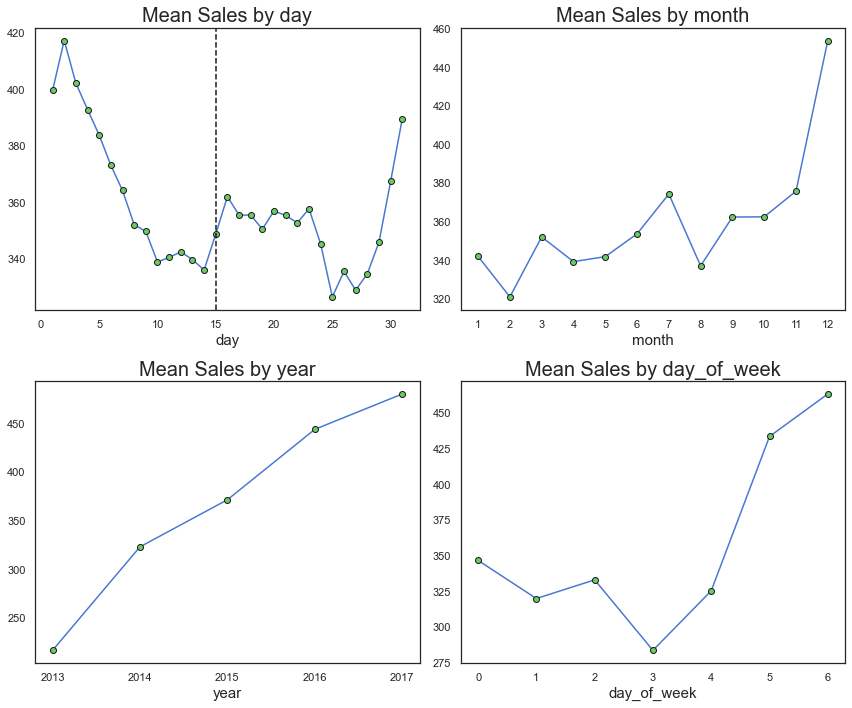

In [94]:
fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(12, 10))

for col, ax in zip(["day", "month", "year", "day_of_week"], axes.flatten()):

    train_df.groupby(col)["sales"].mean().plot(
        ax=ax, marker="o", mfc="g", mec="k")
    ax.set_title(f"Mean Sales by {col}")

    if col in ["year", "month"]:
        ax.set_xticks(train_df.groupby(col)["sales"].mean().index)

    if col == "day":
        ax.axvline(15, linestyle="--", color="k")

*  *Daily Seasonality*: In a month, there is an increase in mean sales after 15th, then it dips down and then increases significantly at the end of the month and continues till the first couple of days of the next month.


* *Monthly Seasonality*: In a year, Sales are very high during December and the falls rapidly down on January.


* *Yearly Seasonality*: There is an increase in mean sales every year.


* *Weekly Seasonality*: In a week, Sales are very high during the weekends and lowest on thursday.

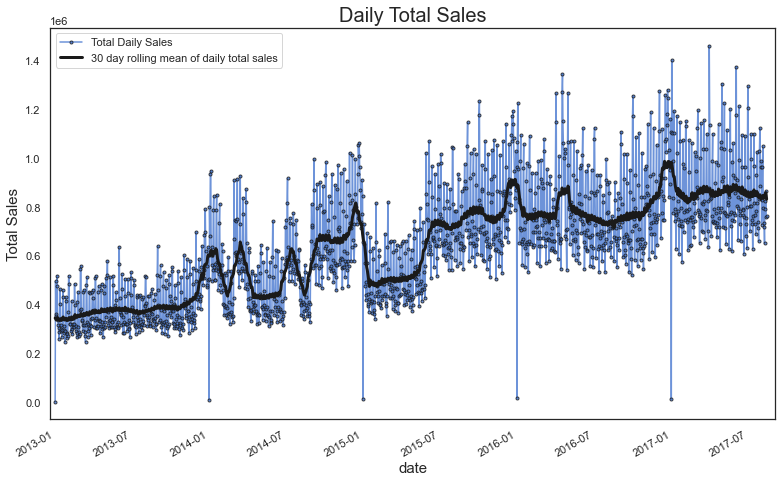

In [35]:
total_daily_sales = train_df.groupby("date")["sales"].sum()

ax = total_daily_sales.plot(y="sales",
                            figsize=(13, 8),
                            marker=".",
                            alpha=0.8,
                            mec='k',
                            legend=None)

total_daily_sales.rolling(window=30, min_periods=7, center=True).mean().\
    plot(ax=ax, lw=3, color="k", legend=None)

plt.legend(
    labels=["Total Daily Sales", "30 day rolling mean of daily total sales"])

plt.title("Daily Total Sales")
plt.ylabel("Total Sales")
plt.xlim("2012-12-20", "2017-09-05")

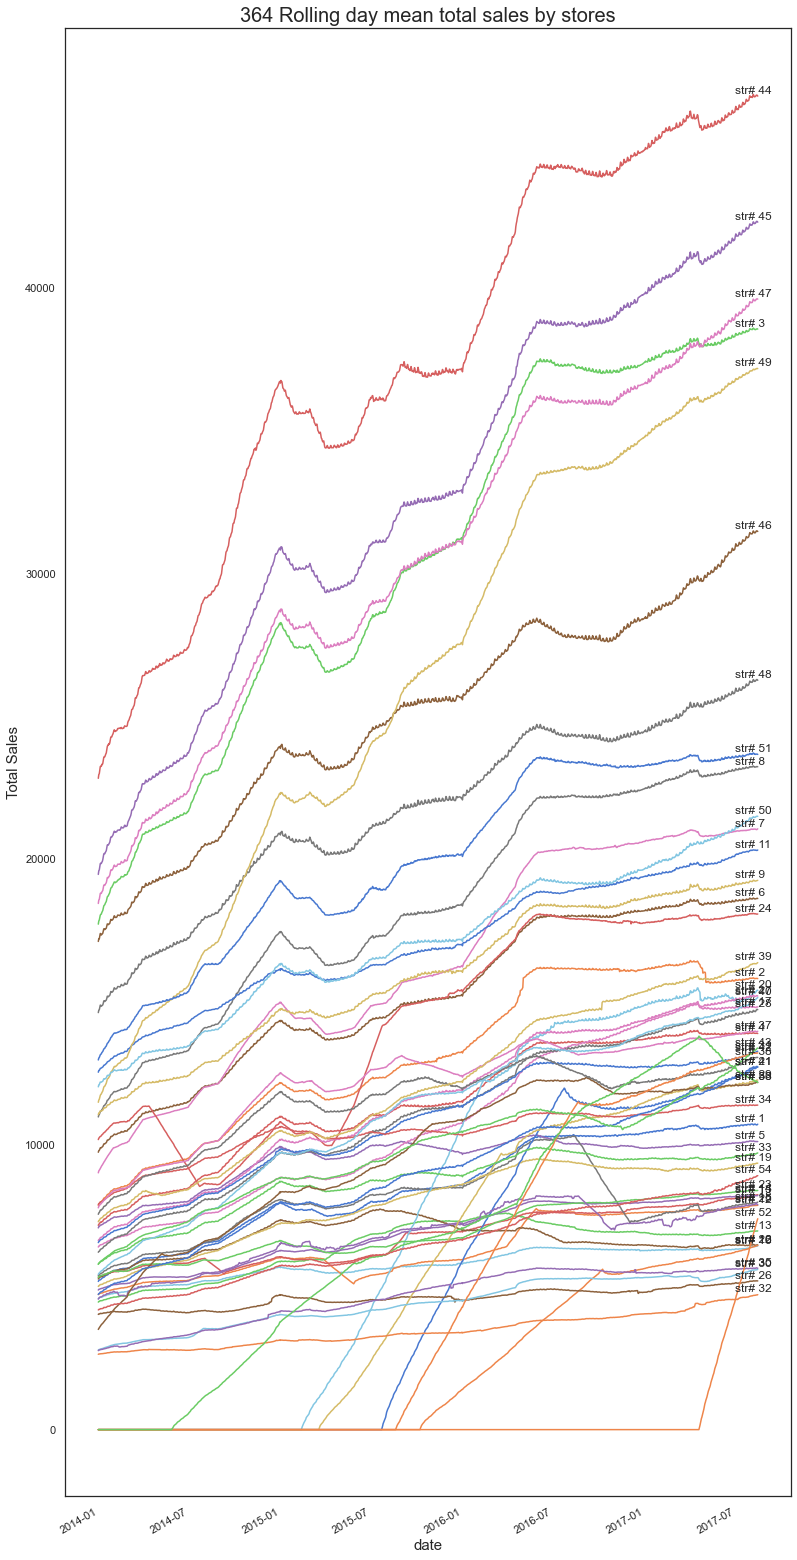

In [36]:
store_total_dly_sales = \
    train_df.groupby(["store_nbr", "date"], as_index=False)["sales"].sum()

fig, ax = plt.subplots(figsize=(13, 30))
roll_period = 365

for store in store_total_dly_sales["store_nbr"].unique():

    roll_mean = \
        store_total_dly_sales.query(f"store_nbr == {store}").set_index("date").\
        rolling(roll_period)["sales"].mean().to_frame(f"{store}")

    roll_mean.plot(ax=ax, legend=None)

    xy_coord = roll_mean.reset_index().iloc[-1, :].values

    ax.annotate(text=f"str# {store}",
                xy=xy_coord,
                xytext=xy_coord + np.array([-pd.Timedelta("45 days"), 100]))

plt.ylabel("Total Sales")
plt.title("364 Rolling day mean total sales by stores")

From the above plot, it is clear that sales across stores differs a lot. Some stores perform very well.

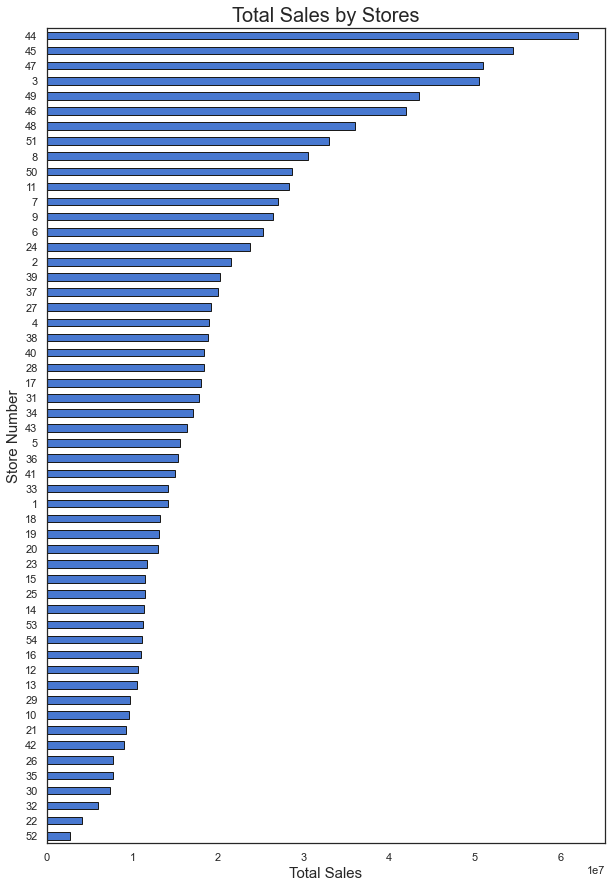

In [37]:
fig, ax = plt.subplots(figsize=(10, 15))

train_df.groupby("store_nbr")["sales"].sum().sort_values().\
    plot(kind="barh", ax=ax, edgecolor="k", title="Total Sales by Stores")

ax.set_xlabel("Total Sales")
ax.set_ylabel("Store Number")

In [38]:
train_df = train_df.merge(store_df, on="store_nbr", how="left")

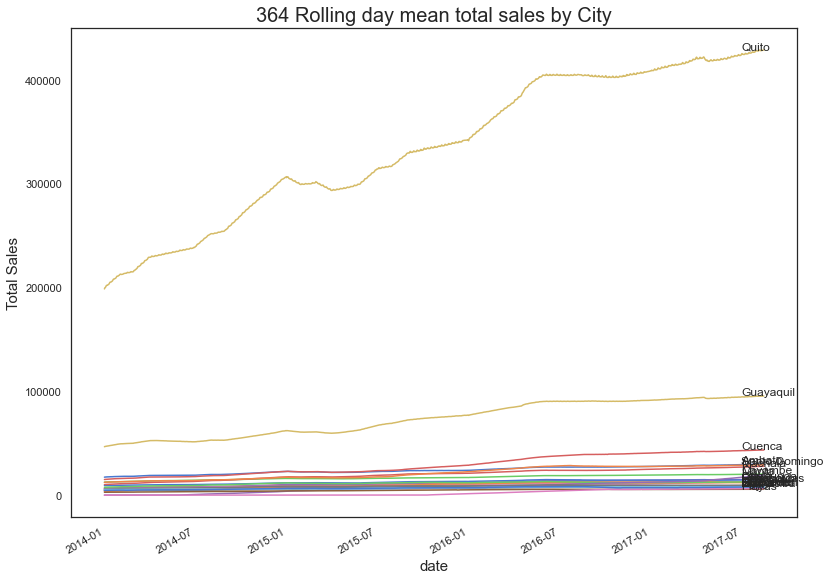

In [39]:
city_dly_sales = train_df.groupby(
    ["city", "date"], as_index=False)["sales"].sum()

fig, ax = plt.subplots(figsize=(13, 10))
roll_period = 365

for city in city_dly_sales["city"].unique():

    roll_mean = \
        city_dly_sales.query(f"city == '{city}'").set_index("date").\
        rolling(roll_period)["sales"].mean().to_frame(f"{city}")

    roll_mean.plot(ax=ax, legend=None)

    xy_coord = roll_mean.reset_index().iloc[-1, :].values

    ax.annotate(text=city,
                xy=xy_coord,
                xytext=xy_coord + np.array([-pd.Timedelta("45 days"), 100]))

plt.ylabel("Total Sales")
plt.title("364 Rolling day mean total sales by City")

The city of *Quito* has the highest total sales compared to any other cities.

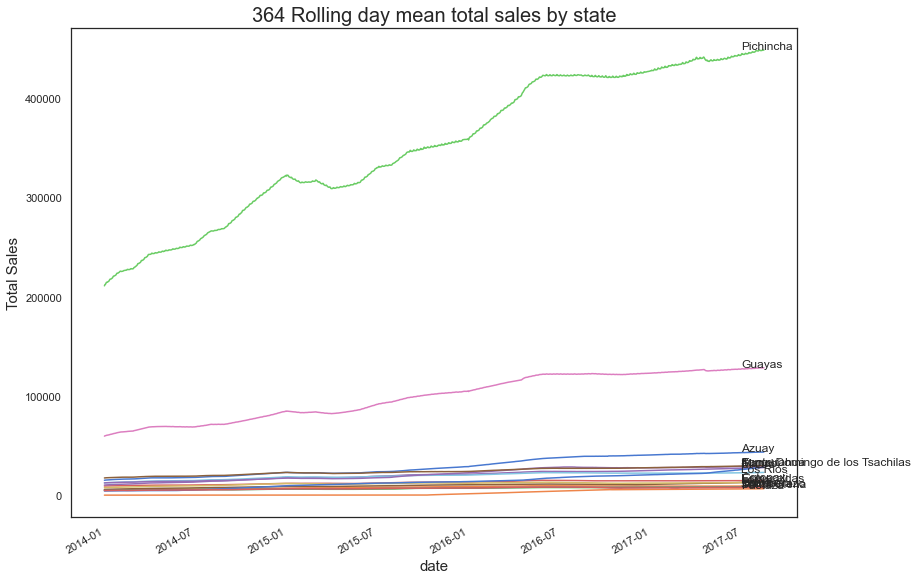

In [40]:
state_dly_sales = train_df.groupby(
    ["state", "date"], as_index=False)["sales"].sum()

fig, ax = plt.subplots(figsize=(13, 10))
roll_period = 365

for state in state_dly_sales["state"].unique():

    roll_mean = \
        state_dly_sales.query(f"state == '{state}'").set_index("date").\
        rolling(roll_period)["sales"].mean().to_frame(f"{state}")

    roll_mean.plot(ax=ax, legend=None)

    xy_coord = roll_mean.reset_index().iloc[-1, :].values

    ax.annotate(text=state,
                xy=xy_coord,
                xytext=xy_coord + np.array([-pd.Timedelta("45 days"), 100]))

plt.ylabel("Total Sales")
plt.title("364 Rolling day mean total sales by state")

In [41]:
store_df.groupby(["state", "city"])["store_nbr"].count()

state                           city         
Azuay                           Cuenca            3
Bolivar                         Guaranda          1
Chimborazo                      Riobamba          1
Cotopaxi                        Latacunga         2
El Oro                          Machala           2
Esmeraldas                      Esmeraldas        1
Guayas                          Daule             1
                                Guayaquil         8
                                Libertad          1
                                Playas            1
Imbabura                        Ibarra            1
Loja                            Loja              1
Los Rios                        Babahoyo          1
                                Quevedo           1
Manabi                          El Carmen         1
                                Manta             2
Pastaza                         Puyo              1
Pichincha                       Cayambe           1
                  

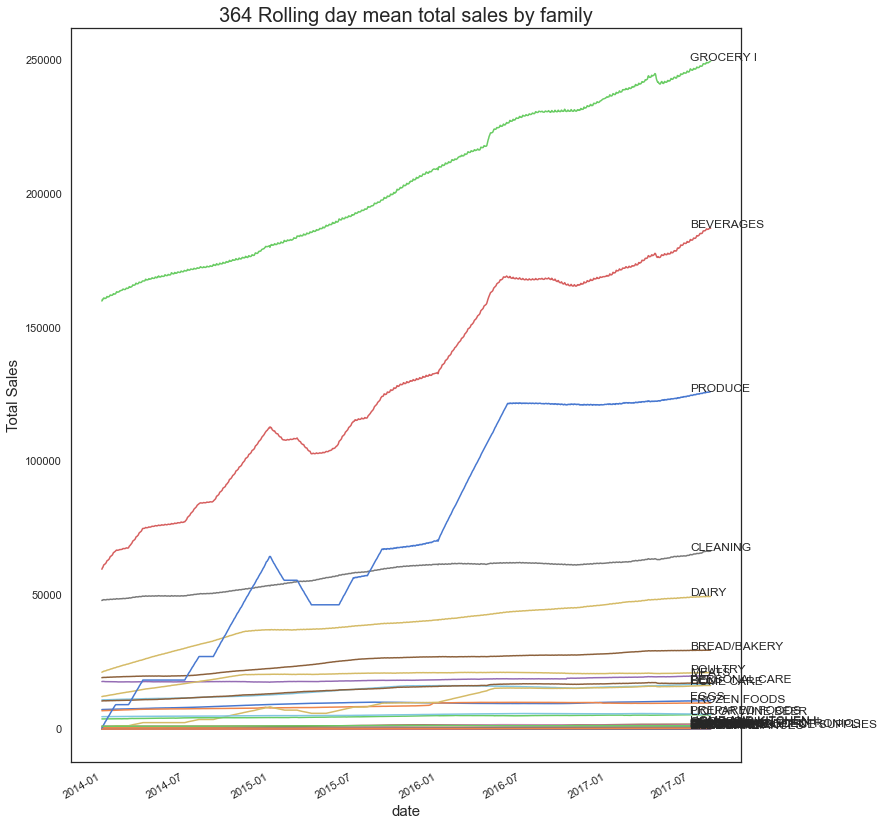

In [42]:
family_total_dly_sales = \
    train_df.groupby(["family", "date"], as_index=False)["sales"].sum()

fig, ax = plt.subplots(figsize=(12, 15))
roll_period = 365

for prd in family_total_dly_sales["family"].unique():

    roll_mean = \
        family_total_dly_sales.query(f"family == '{prd}'").set_index("date").\
        rolling(roll_period)["sales"].mean().to_frame(f"{prd}")

    roll_mean.plot(ax=ax, legend=None)

    xy_coord = roll_mean.reset_index().iloc[-1, :].values

    ax.annotate(text=prd,
                xy=xy_coord,
                xytext=xy_coord + np.array([-pd.Timedelta("45 days"), 100]))

plt.ylabel("Total Sales")
plt.title("364 Rolling day mean total sales by family")

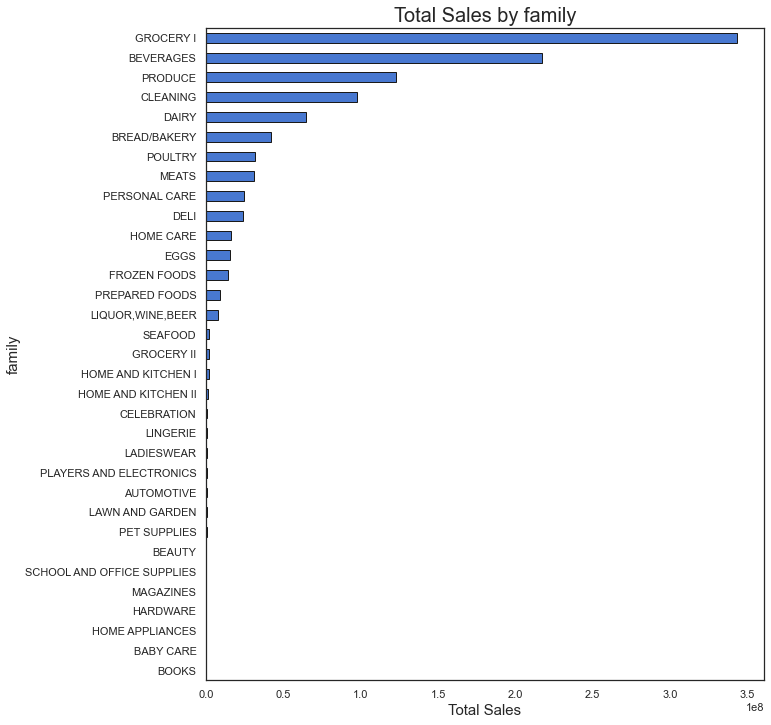

In [43]:
fig, ax = plt.subplots(figsize=(10, 12))

train_df.groupby("family")["sales"].sum().sort_values().\
    plot(kind="barh", ax=ax, edgecolor="k", title="Total Sales by family")

ax.set_xlabel("Total Sales")
ax.set_ylabel("family")

The most selling product family is Grocery I, followed by beverages and produce.

# Visualizing Total Sales by type of days

In [44]:
# Creating variables for each type of day

weekends = set(train_df.loc[train_df["is_weekend"], "date"])

transfer_dates = set(holiday_df.loc[holiday_df["type"].eq("Transfer"), "date"])

earthquake = set(
    holiday_df.loc[holiday_df["description"].str.contains(r'Terremoto Manabi'),
                   "date"])

futbol = set(holiday_df.loc[holiday_df["description"].str.contains(r'futbol'),
                            "date"])

moms_day = set(holiday_df.query(
    "description.str.contains(r'Dia de la Madre')")["date"])

blk_fri = set(holiday_df.query(
    "description.str.contains(r'Black Friday')")["date"])

cyb_mon = set(holiday_df.query(
    "description.str.contains(r'Cyber Monday')")["date"])

add_holidays = set(holiday_df.loc[holiday_df["type"].eq("Additional"), "date"])

christmas = set(holiday_df.loc[
    holiday_df["description"].str.contains(r'navidad', case=False), "date"])

holidays = earthquake.union(
    cyb_mon, blk_fri, moms_day, christmas, transfer_dates, futbol, add_holidays)

# remaining_holidays = \
#     set(
#         holiday_df.loc[
#             ~holiday_df["description"].str.contains(r'navidad', case=False) &
#             ~holiday_df["description"].str.contains(r'Terremoto Manabi') &
#             ~holiday_df["description"].str.contains(r'futbol') &
#             holiday_df["type"].ne(
#                 "Transfer") & holiday_df["type"].ne("Additional"),
#             "date"
#         ]
#     )


remaining_holidays = \
    set(holiday_df.loc[~holiday_df["date"].isin(holidays)
        & holiday_df["type"].ne("Additional"), "date"])

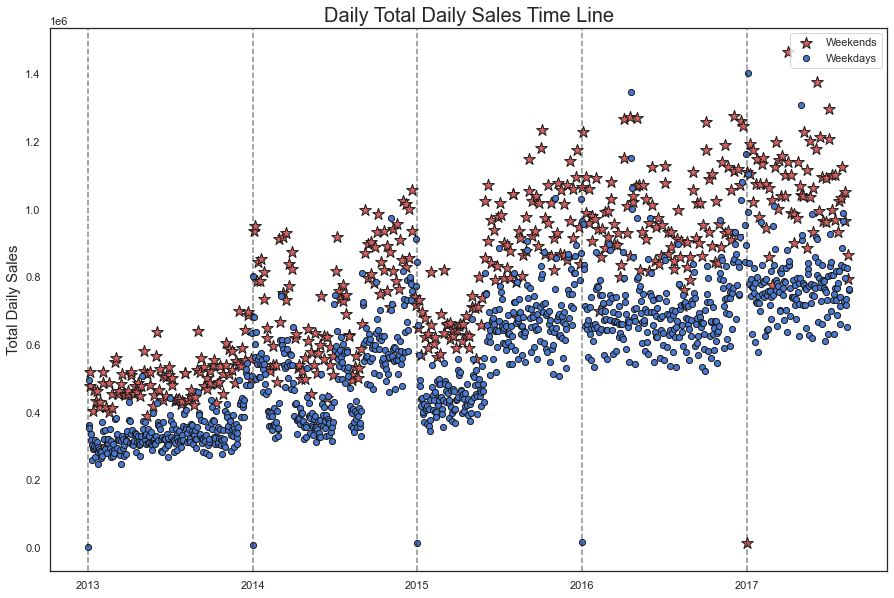

In [45]:
fig, ax = plt.subplots(figsize=(15, 10))

args = dict(x="date",
            y="sales",
            kind="scatter",
            edgecolor="k",
            ax=ax,
            s=150)

# weekends
total_daily_sales[total_daily_sales.index.isin(weekends)].reset_index().\
    plot(**args, marker="*", color="r", label="Weekends")

# Weekdays
total_daily_sales[~total_daily_sales.index.isin(weekends)
                  & ~total_daily_sales.index.isin(christmas)].reset_index(
).plot(**args, color="b", label="Weekdays", marker=".")

ax.set_ylabel("Total Daily Sales")
ax.set_xlabel("")
ax.set_title("Daily Total Daily Sales Time Line")

for newyear in pd.date_range("2013-01-01", "2017-01-01", freq="YS"):
    ax.axvline(newyear, color="k", alpha=0.5, ls="--")

The above plot show the daily total sales (regardless of any stores). The plots illustrates that sales on weekdays are significantly lower than sales on weekends. The sales falls to the lowest during New Year - be it on a weekday or weekend.

Now, I will add certain holidays over the plot and see how sales are affected according to the type of holiday/event.

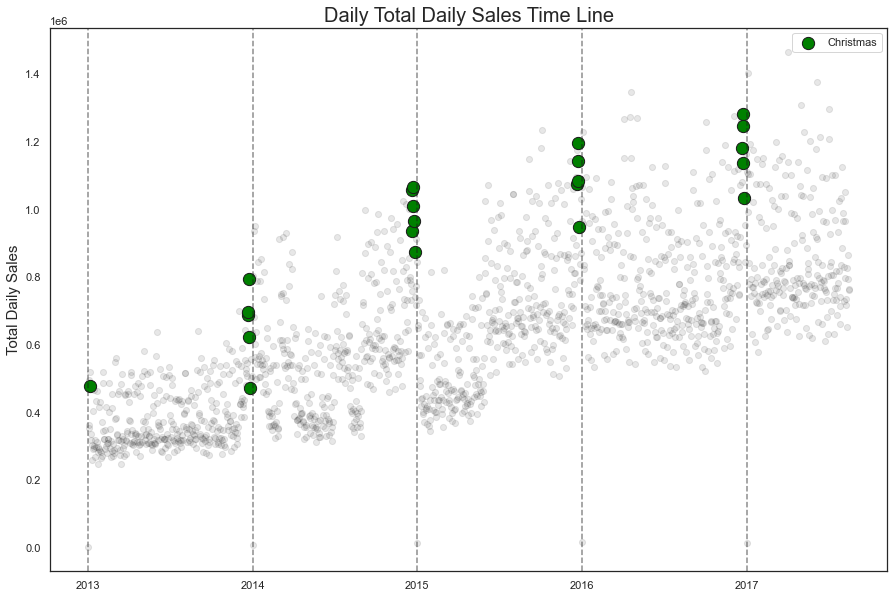

In [46]:
fig, ax = plt.subplots(figsize=(15, 10))

args = dict(x="date",
            y="sales",
            kind="scatter",
            edgecolor="k",
            ax=ax,
            s=150)


total_daily_sales.reset_index().plot(**args, marker=".", alpha=0.1, color="k")

# christmas
total_daily_sales[total_daily_sales.index.isin(christmas)].reset_index().\
    plot(**args, color="green", label="Christmas")


ax.set_ylabel("Total Daily Sales")
ax.set_xlabel("")
ax.set_title("Daily Total Daily Sales Time Line")

for newyear in pd.date_range("2013-01-01", "2017-01-01", freq="YS"):
    ax.axvline(newyear, color="k", alpha=0.5, ls="--")

During Christmas days (additional days and actual chistmas day, from 21 to 26 Dec), there is sharp increase in sales.

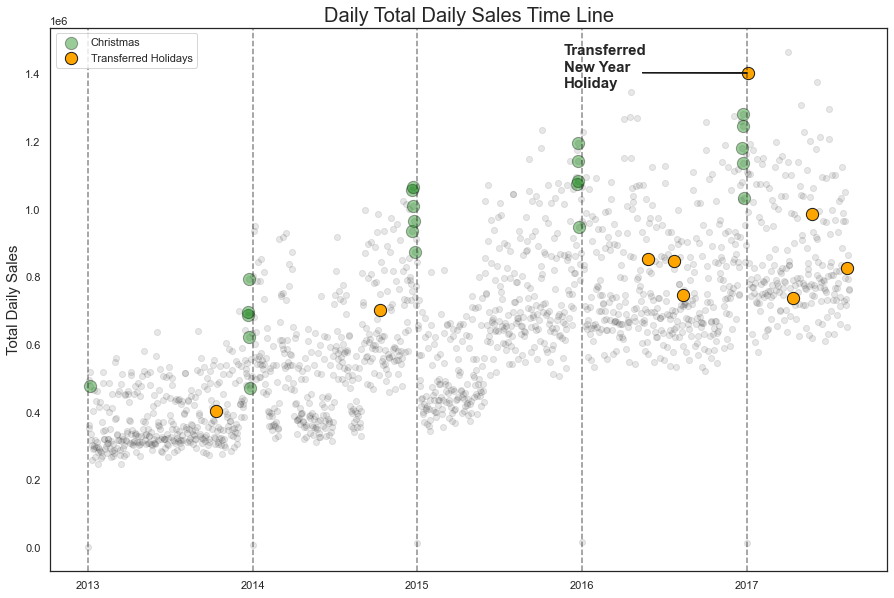

In [47]:
fig, ax = plt.subplots(figsize=(15, 10))

args = dict(x="date",
            y="sales",
            kind="scatter",
            edgecolor="k",
            ax=ax,
            s=150)

total_daily_sales.reset_index().plot(**args, marker=".", alpha=0.1, color="k")

# christmas
total_daily_sales[total_daily_sales.index.isin(christmas)].reset_index().\
    plot(**args, color="green", label="Christmas", alpha=0.4)

# Transferred Holidays
total_daily_sales[total_daily_sales.index.isin(transfer_dates)].reset_index().\
    plot(**args, color="orange", label="Transferred Holidays")


ax.annotate("Transferred\nNew Year\nHoliday",
            xy=(pd.to_datetime("2017-01-02"), 1.402306e+06),
            xytext=(pd.to_datetime("2015-11-21"), 1.36e+06),
            fontsize=15,
            fontweight="bold")


ax.arrow(x=pd.to_datetime("2017-01-02"),
         y=1.402306e+06,
         dx=-10,
         dy=20,
         head_length=500,
         fc='k',
         ec='k')


ax.set_ylabel("Total Daily Sales")
ax.set_xlabel("")
ax.set_title("Daily Total Daily Sales Time Line")

for newyear in pd.date_range("2013-01-01", "2017-01-01", freq="YS"):
    ax.axvline(newyear, color="k", alpha=0.5, ls="--")

Sales on Transferred days mostly depends on whether that day falls on a weekday or weekend.There was one exception where a new year on 2017 was transferred to the 2nd of Jan 2017. This particular day saw high sales.

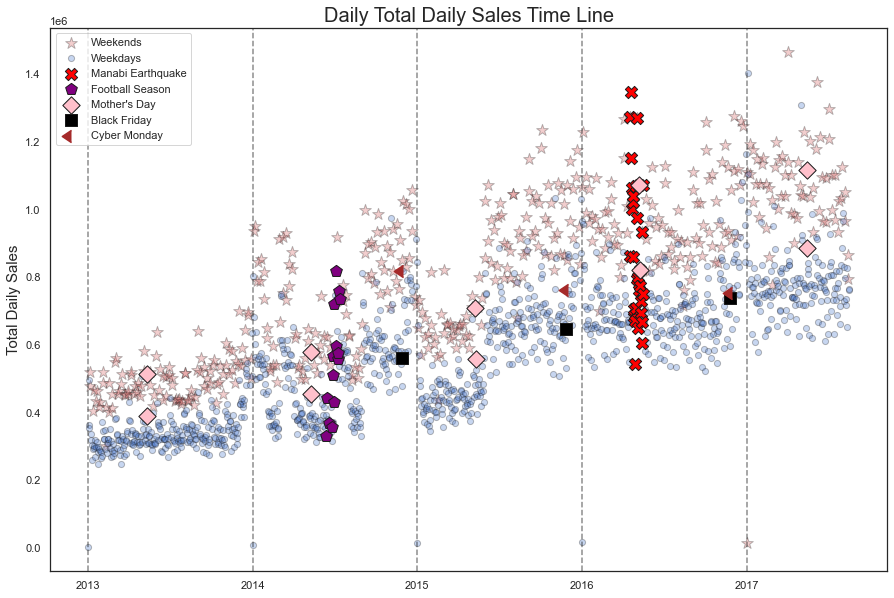

In [48]:
fig, ax = plt.subplots(figsize=(15, 10))

args = dict(x="date",
            y="sales",
            kind="scatter",
            edgecolor="k",
            ax=ax,
            s=150)


# weekends
total_daily_sales[total_daily_sales.index.isin(weekends)].reset_index().\
    plot(**args, marker="*", color="r", label="Weekends", alpha=0.3)


# Weekdays
total_daily_sales[~total_daily_sales.index.isin(weekends)
                  & ~total_daily_sales.index.isin(christmas)].reset_index(
).plot(**args, color="b", label="Weekdays", marker=".", alpha=0.3)


# Earthquake Event
total_daily_sales[total_daily_sales.index.isin(earthquake)].reset_index().\
    plot(**args, color="red", marker="X", label="Manabi Earthquake")


# Footbal Event
total_daily_sales[total_daily_sales.index.isin(futbol)].reset_index().\
    plot(**args, color="purple", marker="p", label="Football Season")


# Mothers day
total_daily_sales[total_daily_sales.index.isin(moms_day)].reset_index().\
    plot(**args, color="Pink", marker="D", label="Mother's Day")


# Black Friday
total_daily_sales[total_daily_sales.index.isin(blk_fri)].reset_index().\
    plot(**args, color="black", marker="s", label="Black Friday")


# Cyber Monday
total_daily_sales[total_daily_sales.index.isin(cyb_mon)].reset_index().\
    plot(**args, color="brown", marker=8, label="Cyber Monday")


ax.set_ylabel("Total Daily Sales")
ax.set_xlabel("")
ax.set_title("Daily Total Daily Sales Time Line")

for newyear in pd.date_range("2013-01-01", "2017-01-01", freq="YS"):
    ax.axvline(newyear, color="k", alpha=0.5, ls="--")

The above plot illustrates the effect of certain events on total daily sales. It seems like the sales is mostly affected by the weekday or weekend rather than the actual event itself. If the event falls on a weekday, the sales remains normal as of any other weekday. Whereas if the event falls on a weekend, the sales is noticeably higher. The only significant sales are seen during the April 2016 Manabi earthquake. Highest sales are seen on weekend during the earthquake event.

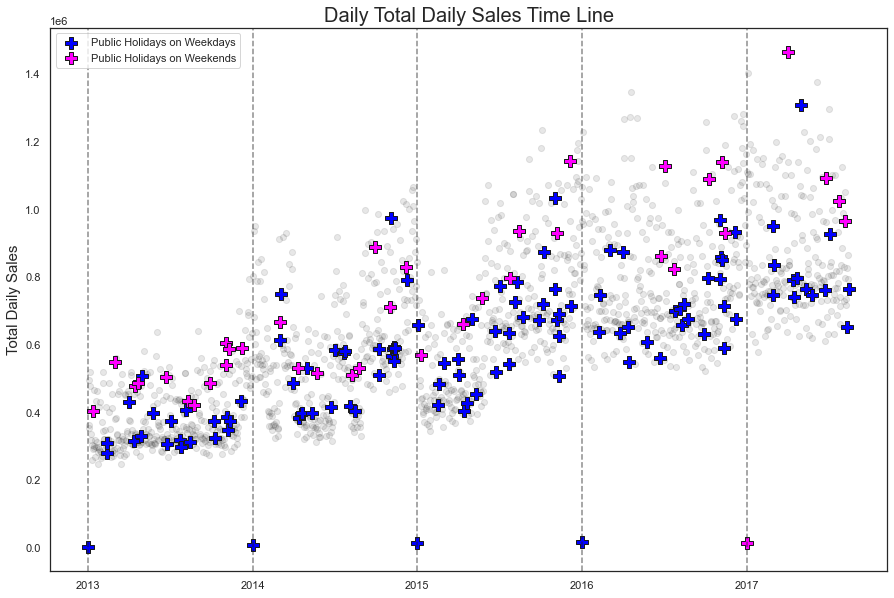

In [49]:
fig, ax = plt.subplots(figsize=(15, 10))

args = dict(x="date",
            y="sales",
            kind="scatter",
            edgecolor="k",
            ax=ax,
            s=150)

total_daily_sales.reset_index().plot(**args, marker=".", alpha=0.1, color="k")


total_daily_sales[
    total_daily_sales.index.isin(remaining_holidays) &
    ~total_daily_sales.index.isin(weekends)
].reset_index().\
    plot(**args, color="blue", marker="P", label="Public Holidays on Weekdays")


total_daily_sales[
    total_daily_sales.index.isin(remaining_holidays) &
    total_daily_sales.index.isin(weekends)
].reset_index().\
    plot(**args, color="magenta", marker="P",
         label="Public Holidays on Weekends")


ax.set_ylabel("Total Daily Sales")
ax.set_xlabel("")
ax.set_title("Daily Total Daily Sales Time Line")

for newyear in pd.date_range("2013-01-01", "2017-01-01", freq="YS"):
    ax.axvline(newyear, color="k", alpha=0.5, ls="--")

The above plots show remaining holidays. These holidays do not necessarily affect sales (depends on whether the holiday falls on a weekday or weekend).

In [ ]:
# total_daily_sales = total_daily_sales.to_frame()


# total_daily_sales.loc[total_daily_sales.index.isin(christmas),
#                       "is_christmas"] = True

# total_daily_sales.loc[total_daily_sales.index.isin(transfer_dates),
#                       "is_transfereed"] = True

# # total_daily_sales.loc[total_daily_sales.index.isin(earthquake),
# #                       "is_earthquake"] = True

# # total_daily_sales.loc[total_daily_sales.index.isin(futbol),
# #                       "is_footbal_event"] = True

# # total_daily_sales.loc[total_daily_sales.index.isin(add_holidays),
# #                       "is_add_holidays"] = True

# # total_daily_sales.loc[total_daily_sales.index.isin(add_holidays),
# #                       "is_add_holidays"] = True

# total_daily_sales.loc[total_daily_sales.index.isin(remaining_holidays), "is_other_holiday"] = True


# total_daily_sales.head()

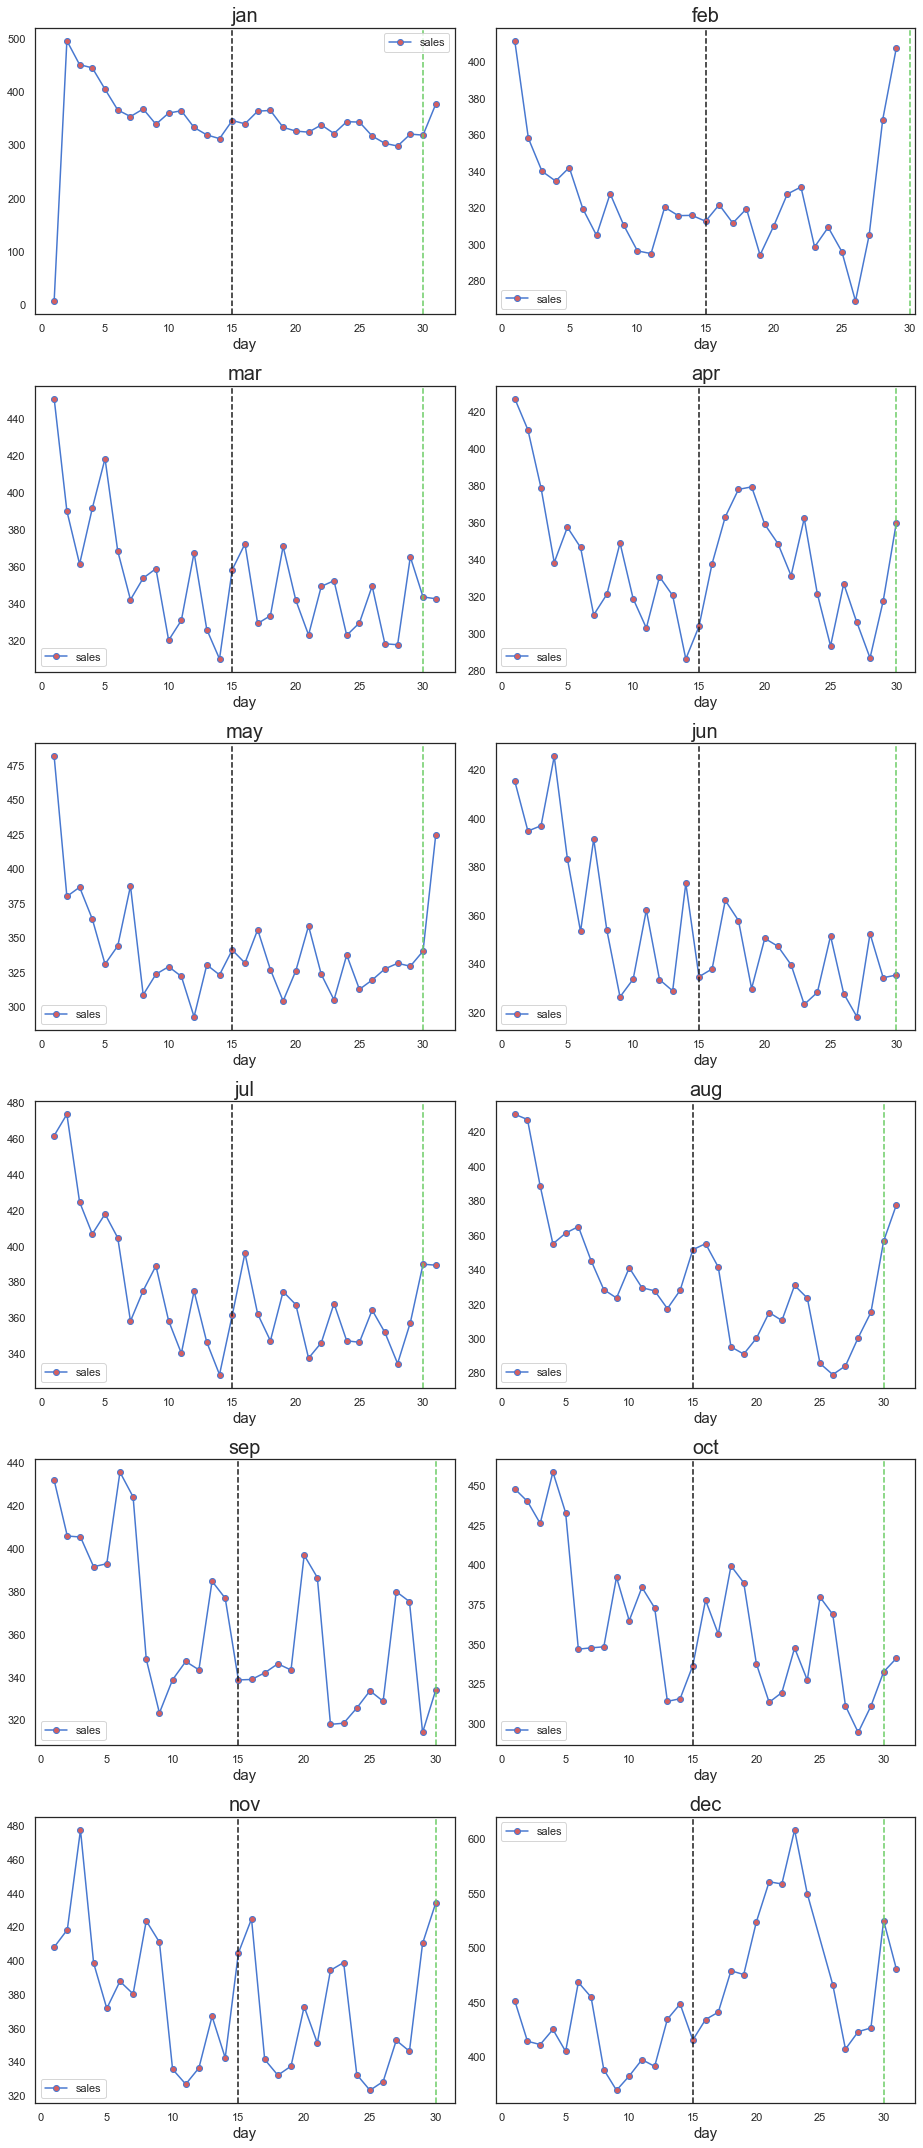

In [88]:
mnth = {
    1: "jan", 2: "feb", 3: "mar", 4: "apr", 5: "may", 6: "jun", 7: "jul", 8: "aug",
    9: "sep", 10: "oct", 11: "nov", 12: "dec"
}

month_day_sales = train_df.groupby(
    ["month", "day"], as_index=False)["sales"].mean()
month_day_sales

fig, axes = plt.subplots(6, 2, tight_layout=True, figsize=(13, 30))

for i, mnth, ax in zip(mnth.keys(), mnth.values(), axes.flatten()):

    month_day_sales.query(f"month == {i}").plot(
        x="day", y="sales", ax=ax, marker="o", mfc="r")

    ax.set_title(mnth)

    ax.axvline(15, linestyle="--", color="k")

    ax.axvline(30, linestyle="--", color="g")

In [95]:
train_df

,date,store_nbr,family,sales,onpromotion,day,month,year,day_of_week,day_of_year,is_weekend,city,state,type,cluster
0,2013-01-01,1,AUTOMOTIVE,0.000,0,1,1,2013,1,1,False,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.000,0,1,1,2013,1,1,False,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.000,0,1,1,2013,1,1,False,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.000,0,1,1,2013,1,1,False,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.000,0,1,1,2013,1,1,False,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.133,0,15,8,2017,1,227,False,Quito,Pichincha,B,6
3000884,2017-08-15,9,PREPARED FOODS,154.553,1,15,8,2017,1,227,False,Quito,Pichincha,B,6
3000885,2017-08-15,9,PRODUCE,2419.729,148,15,8,2017,1,227,False,Quito,Pichincha,B,6
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,15,8,2017,1,227,False,Quito,Pichincha,B,6


In [ ]:
daytype_sales = \
    total_daily_sales.melt(id_vars="sales").dropna().drop("value", axis=1)

plt.figure(figsize=(13, 6))

sns.boxplot(x="sales", y="variable", data=daytype_sales, orient="h")

In [ ]:
train_df_storetype = \
    train_df.merge(store_groups, on="store_nbr").\
    groupby(["date", "type"], as_index=False)["sales"].sum()

In [ ]:
fig, ax = plt.subplots(figsize=(13, 5))

sns.boxplot(x="sales", y="type", data=train_df_storetype, orient="h")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
roll_period = 365

for store in train_df_storetype["type"].unique():

    roll_mean = \
        train_df_storetype.query(f"type == '{store}'").set_index("date").\
        rolling(roll_period)["sales"].mean().to_frame(f"{store}")

    roll_mean.plot(ax=ax, legend=None)

    xy_coord = roll_mean.reset_index().iloc[-1, :].values

    ax.annotate(text=f"Type# {store}",
                xy=xy_coord,
                xytext=xy_coord + np.array([-pd.Timedelta("45 days"), 100]))

plt.ylabel("Total Sales")
plt.title("364 Rolling day mean total sales by store types")

# Promotion

In [ ]:
train_df["is_promotion"] = np.where(train_df["onpromotion"].eq(0), 0, 1)

In [ ]:
sns.boxplot(x="sales",
            y="is_promotion",
            data=train_df,
            orient="h",
            showfliers=False)

In [ ]:
plt.figure(figsize=(13, 12))

sns.boxplot(x="onpromotion",
            y="store_nbr",
            data=train_df.query("is_promotion == 1"),
            orient="h",
            showfliers=False)

In [ ]:
plt.figure(figsize=(13, 12))

sns.boxplot(x="onpromotion",
            y="family",
            data=train_df.query("is_promotion == 1"),
            orient="h",
            showfliers=False)

In [ ]:
fig, axes = plt.subplots(11, 3, tight_layout=True, figsize=(15, 45))

for prd, ax in zip(train_df["family"].unique(), axes.flatten()):

    sns.scatterplot(
        x="onpromotion",
        y="sales",
        data=train_df.query(f"is_promotion == 1 and family == '{prd}'"),
        edgecolor="k",
        alpha=0.5,
        hue="day_of_week",
        ax=ax,
        palette="Paired",
    )

    ax.set_title(prd)
    ax.legend(labels=["mon", "tue", "wed", "thur", "fri", "sat", "sun"],
              loc="upper right",
              ncol=3)

In [ ]:
train_df.query("onpromotion > 0").\
    plot(x="date", y="onpromotion", kind="scatter",
         figsize=(13, 7), marker=".", legend=None)

plt.axvline(pd.to_datetime("2016-04-20"), color="k")
plt.axvline(pd.to_datetime("2016-06-7"), color="k")

In [ ]:
fig, ax = plt.subplots(figsize=(13, 7))

for prd in set(train_df["family"]):

    train_df.query(
        f"onpromotion > 0 and date >= '2016-04-28' and date <= '2016-06-01' and family == '{prd}'"
    ).plot(x="date",
           y="onpromotion",
           linestyle="",
           marker=".",
           legend=None,
           rot=45,
           ax=ax,
           label=f"{prd}")

plt.legend(ncol=3, bbox_to_anchor=(0.9, -0.2))

In [ ]:
train_df.query("onpromotion > 0 and date >= '2016-04-28' and date <= '2016-06-01'").\
    groupby(["store_nbr", "family"], as_index=False)["onpromotion"].mean().\
    sort_values("onpromotion", ascending=False).head(20)

In [ ]:
store_df.query("store_nbr in (53, 54)")
# earthquake happened in the state of manabi.
# Hence both of these stores where giving high promotions for a whole month after the disaster.

In [ ]:
fig, axes = plt.subplots(2, 2, tight_layout=True, figsize=(12, 10))

for col, ax in zip(["day", "month", "year", "day_of_week"], axes.flatten()):

    train_df.groupby(col)["onpromotion"].mean().plot(ax=ax)
    ax.set_title(f"Mean Promotion by {col}")

    if col in ["year", "month"]:
        ax.set_xticks(train_df.groupby(col)["onpromotion"].mean().index)

In [ ]:
total_sales_promot = \
    train_df.query("onpromotion != 0").groupby(
        "date")[["sales", "onpromotion"]].sum()

total_sales_promot["dayofweek"] = total_sales_promot.index.dayofweek

fig, ax = plt.subplots(figsize=(10, 6))

total_sales_promot.plot(x="onpromotion",
                        y="sales",
                        kind="scatter",
                        c="dayofweek",
                        cmap="hsv",
                        edgecolor="k",
                        marker="o",
                        alpha=0.5,
                        s=100,
                        ax=ax)

ax.set_xlabel("onpromotion")

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))

for i in np.arange(7):

    total_sales_promot.query(f"dayofweek == {i}").\
        plot(y="onpromotion", linestyle="", marker=".", ax=ax, label=f"{i}")

ax.legend(labels=["mon", "tue", "wed", "thur", "fri", "sat", "sun"])

In [ ]:
tot_sales_promot_family = \
    train_df.query("onpromotion != 0").\
    groupby(["date", "family"], as_index=False)[["sales", "onpromotion"]].sum()

tot_sales_promot_family["dayofweek"] = tot_sales_promot_family[
    "date"].dt.dayofweek

fig, axes = plt.subplots(16, 2, tight_layout=True, figsize=(13, 60))

for prd, ax in zip(tot_sales_promot_family["family"].unique(), axes.flatten()):

    sns.scatterplot(
        x="onpromotion",
        y="sales",
        data=tot_sales_promot_family.query(f"family == '{prd}'"),
        edgecolor="k",
        alpha=0.5,
        hue="dayofweek",
        ax=ax,
        palette="Paired",
        #         legend = None
    )

    ax.set_title(prd)
    ax.legend(labels=["mon", "tue", "wed", "thur", "fri", "sat", "sun"],
              loc="lower right",
              ncol=4)

# Sales vs oil price

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))

agg_df = train_df.groupby("date")["sales"].sum().to_frame().\
    join(oil_df_imputed).fillna(method="ffill")

size = agg_df["sales"] / 8000

agg_df.plot(x="dcoilwtico",
            y="sales",
            kind="scatter",
            edgecolor="k",
            alpha=0.7,
            c="dcoilwtico",
            ax=ax,
            s=size)

ax.axvline(71.5, linestyle="--", color="r", alpha=0.8)

In [ ]:
agg_df.query("dcoilwtico < 71.2")["sales"].median()

In [ ]:
agg_df.query("dcoilwtico >= 71.2")["sales"].median()

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))
ax2 = ax.twinx()

agg_df.plot(y="sales", ax=ax, color="b", label="sales")
agg_df.plot(y="dcoilwtico", ax=ax2, color="r")

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))

train_df.plot(y="sales",
              x="onpromotion",
              kind="scatter",
              s=100,
              alpha=0.6,
              c="day_of_week",
              cmap="Paired",
              edgecolor="k",
              ax=ax)

In [ ]:
train_df["log_sales"] = np.log(train_df["sales"] + 0.1)
train_df["log_onpromotion"] = np.log(train_df["onpromotion"] + 0.1)

In [ ]:
fig, ax = plt.subplots(figsize=(13, 6))

train_df.query("is_promotion == 1").plot(y="log_sales",
                                         x="log_onpromotion",
                                         kind="scatter",
                                         s=100,
                                         alpha=0.6,
                                         c="day_of_week",
                                         cmap="Paired",
                                         edgecolor="k",
                                         ax=ax)

In [ ]:
set(train_df.loc[train_df["onpromotion"] > 230, "date"])